In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
original_dataset_dir = './Dataset/'

In [3]:
train_dir = './Dataset/Train'
test_dir = './Dataset/Test'

In [4]:
os.listdir(train_dir)

['0', '1']

In [5]:
os.listdir(test_dir)

['0', '1']

## Data Visualization

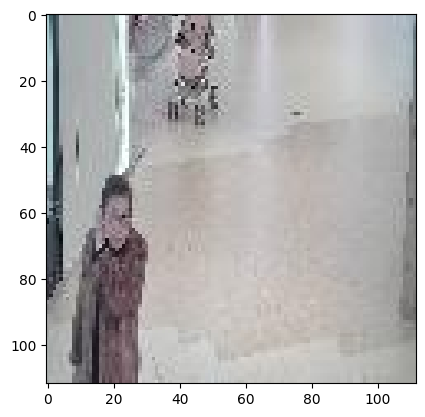

In [6]:
gun_included = os.listdir(train_dir+'\\0')[0]
temp_img = train_dir+'\\0'+'\\0000010bbdcddc2007f5d2489d9b740f.jpg'
pic = imread(temp_img)
plt.imshow(pic)

(112, 112, 3)

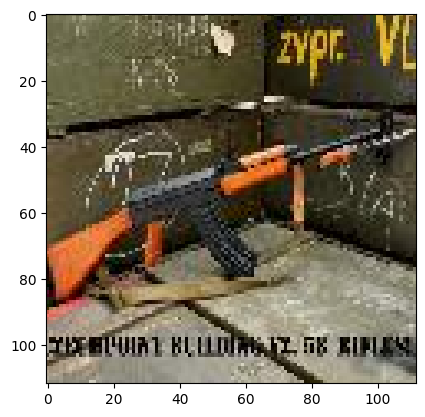

In [7]:
gun_not_included = os.listdir(train_dir+'\\1')[0]
temp_img = train_dir+'\\1'+'\\00000003.jpg'
pic = imread(temp_img)
plt.imshow(pic)
pic.shape

## Quantity Of Images

In [8]:
len(os.listdir(train_dir+'\\0'))

50000

In [9]:
len(os.listdir(test_dir+'\\1'))

998

## preparing the data for the model

In [10]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               zoom_range=0.1, 
                               fill_mode='nearest'
                              )

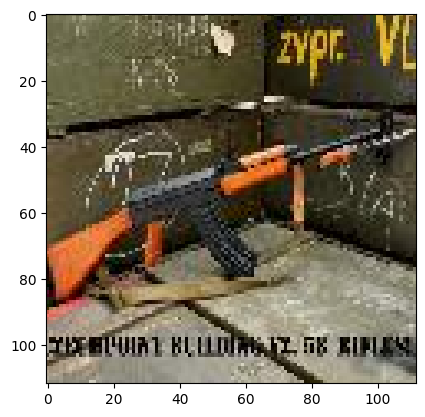

In [11]:
plt.imshow(pic)

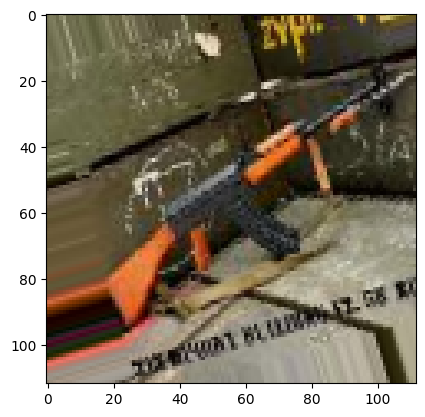

In [12]:
plt.imshow(image_gen.random_transform(pic))

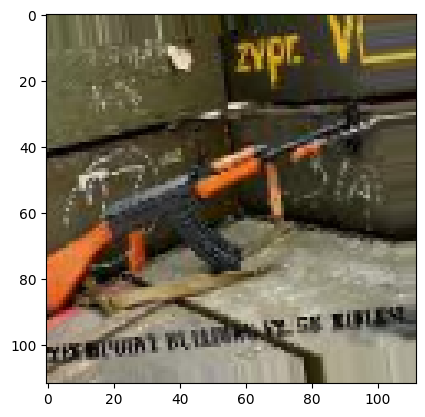

In [13]:
plt.imshow(image_gen.random_transform(pic))

In [14]:
image_gen.flow_from_directory(train_dir)

Found 100000 images belonging to 2 classes.


In [15]:
image_gen.flow_from_directory(test_dir)

Found 1978 images belonging to 2 classes.


## Model

In [16]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_accuracy',patience=7)

In [18]:
from keras.applications import VGG16

In [19]:
conv_base = VGG16(weights= 'imagenet',
               include_top= False,
               input_shape= (64, 64, 3))

In [20]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [21]:
batch_size = 8

In [22]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=(64, 64),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 100000 images belonging to 2 classes.


In [23]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=(64, 64),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 1978 images belonging to 2 classes.


In [24]:
train_image_gen.class_indices

{'0': 0, '1': 1}

In [25]:
# With Fine tunning
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [26]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
 activation (Activation)     (None, 1)                 0

In [27]:
result = model.fit(train_image_gen,
                            epochs=50,
                            validation_data=test_image_gen,
                            callbacks=[early_stop])

Epoch 1/50
12500/12500 [==============================] - 164s 13ms/step - loss: 0.2876 - accuracy: 0.8743 - val_loss: 0.4522 - val_accuracy: 0.7973
Epoch 2/50
12500/12500 [==============================] - 160s 13ms/step - loss: 0.1922 - accuracy: 0.9210 - val_loss: 0.4011 - val_accuracy: 0.8210
Epoch 3/50
12500/12500 [==============================] - 160s 13ms/step - loss: 0.1706 - accuracy: 0.9327 - val_loss: 0.3755 - val_accuracy: 0.8246
Epoch 4/50
12500/12500 [==============================] - 160s 13ms/step - loss: 0.1519 - accuracy: 0.9403 - val_loss: 0.4036 - val_accuracy: 0.8195
Epoch 5/50
12500/12500 [==============================] - 160s 13ms/step - loss: 0.1560 - accuracy: 0.9450 - val_loss: 0.4307 - val_accuracy: 0.8261
Epoch 6/50
12500/12500 [==============================] - 160s 13ms/step - loss: 0.1340 - accuracy: 0.9485 - val_loss: 0.4798 - val_accuracy: 0.8225
Epoch 7/50
12500/12500 [==============================] - 160s 13ms/step - loss: 0.1313 - accuracy: 0.9517

In [29]:
loss_value = result.history['loss']
acc_value = result.history['accuracy']
val_loss_value = result.history['val_loss']
val_acc_value = result.history['val_accuracy']

epochs = range(1,len(loss_value)+1)

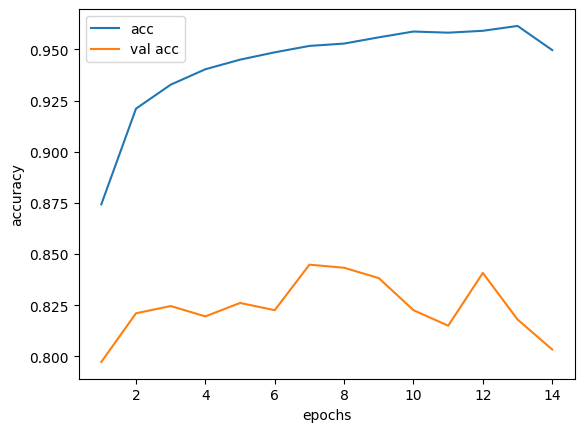

In [30]:
plt.plot(epochs, acc_value, label='acc')
plt.plot(epochs, val_acc_value, label='val acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

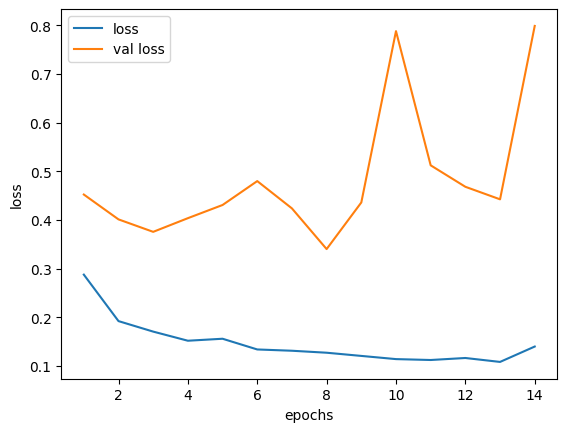

In [31]:
plt.plot(epochs, loss_value, label='loss')
plt.plot(epochs, val_loss_value, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()